Predicting the outcome of the drugs that might be accurate for a patient

Data Preprocessing

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
#1. Preprocess data by applying all concepts covered including
#  -dealing with empty values
#  -Handling categorical and non-numeric values(use any type of encoding)
#  -Generate few plots; bar and pie plots using any features but should include both single and multivariate plots.

#2. drop one feature if two features have a correlation greater than 0.9


In [36]:
Data = pd.read_csv('C:/Users/Chrys/Downloads/Drug_data.csv')
Data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [23]:
Data.shape

(200, 6)

In [24]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [25]:
Data.isnull().sum() #There are no empty values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [45]:
encoder = LabelEncoder()

Data['Sex'] = encoder.fit_transform(Data['Sex'])
Data['BP'] = encoder.fit_transform(Data['BP'])
Data['Cholesterol'] = encoder.fit_transform(Data['Cholesterol'])
Data['Drug'] = encoder.fit_transform(Data['Drug'])

Data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 8.7 KB


<Axes: ylabel='BP'>

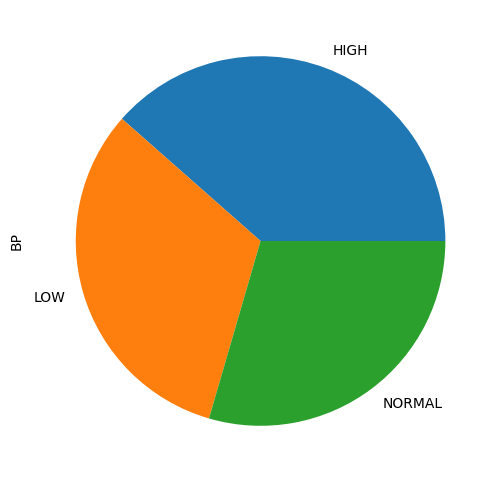

In [37]:
Data['BP'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: ylabel='Drug'>

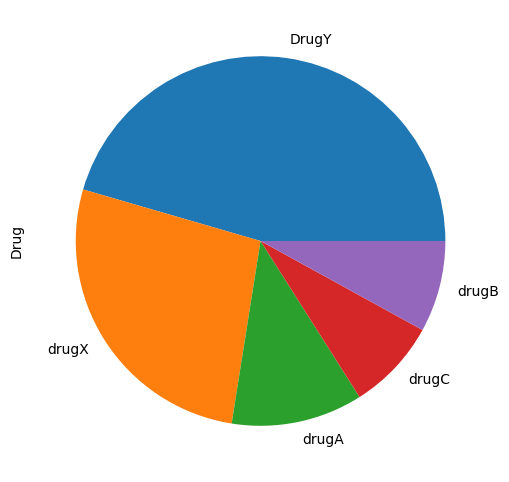

In [38]:
Data['Drug'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='BP', ylabel='Drug'>

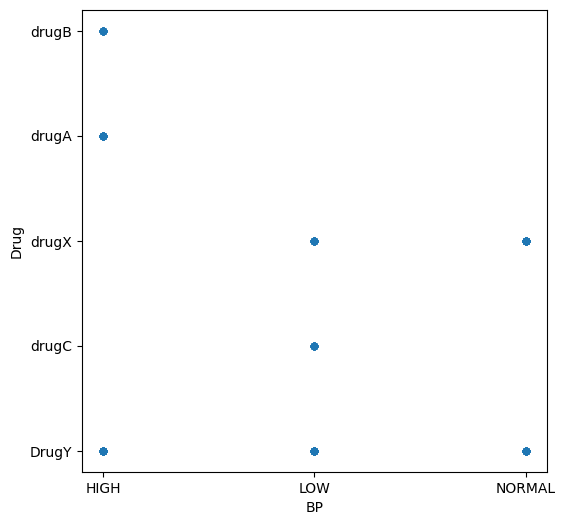

In [39]:
Data.plot(kind='scatter', x='BP', y='Drug', figsize=(6,6))

<Axes: xlabel='Sex', ylabel='Drug'>

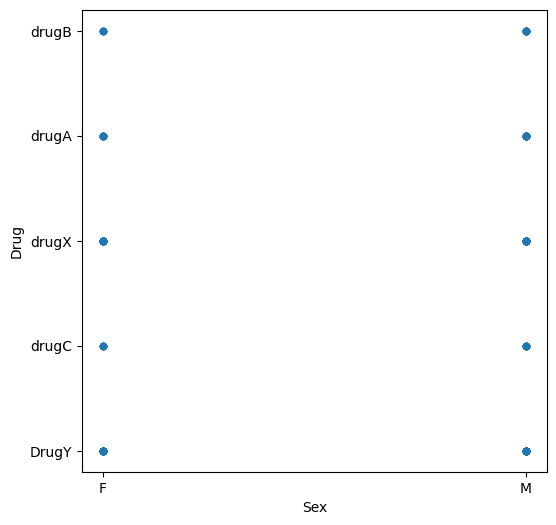

In [41]:
Data.plot(kind='scatter', x='Sex', y='Drug', figsize=(6,6))

<Axes: xlabel='Na_to_K', ylabel='Drug'>

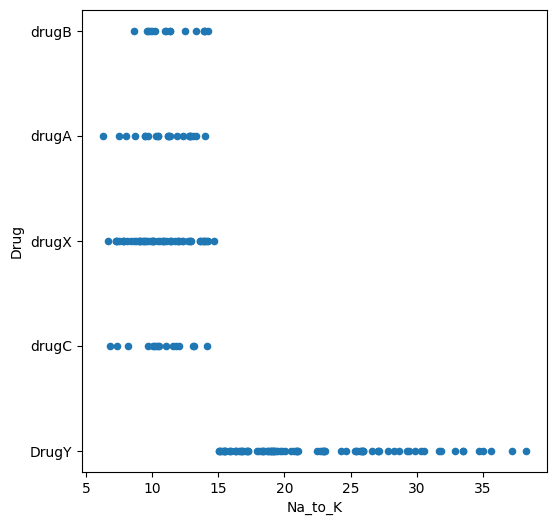

In [43]:
Data.plot(kind='scatter', x='Na_to_K', y='Drug', figsize=(6,6))

In [47]:
correlation = Data.corr()
correlation

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


In [75]:
correlation_matrix = Data.corr()
high_correlation = (correlation_matrix > 0.9) & (correlation_matrix < 1)
columns_to_drop = set()

for col in high_correlation.columns:
    correlated_cols = high_correlation.index[high_correlation[col]]
    if len(correlated_cols) > 0:
        columns_to_drop.add(min(correlated_cols)) 
Data = Data.drop(columns=columns_to_drop)        

Data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


Model building

In [106]:
#Split data into target feature and independent features(check meta-data)
Target_feature = Data['Drug']

y = Target_feature

y



0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [107]:
X = Data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [108]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# Predict the target variable for the test data
y_pred = model.predict(X_test)
y_pred

array([ 2.47435756,  1.2821606 ,  3.6464442 ,  2.34976767, -0.93481556,
        0.39858735, -0.06651203,  2.65818686,  1.60151467,  3.71364976,
        1.2496711 ,  2.53107348,  1.06964265,  1.27243302,  1.68509898,
        1.63057191,  1.80565789,  3.76458437,  2.48018168,  0.74287441,
        1.72238283,  2.44780091,  3.17244937, -0.18815394,  0.79875722,
       -0.27841252,  2.41567616,  3.24042837, -0.32756808,  2.13139706,
        1.2478904 ,  2.77096564,  1.8000083 ,  1.02209777,  2.22227339,
       -0.77360013,  2.37005686,  1.32631411,  0.65876999,  1.58651106,
        2.65327134,  3.01500617,  3.48507749, -1.17709375,  1.09476335,
        2.17902284,  1.11793054, -0.33692051,  1.16972077,  2.53256719,
        3.56345199,  1.43240499,  3.31921329,  0.68830008,  3.07723284,
        1.45411561,  2.59617898, -1.90199436,  2.32906169, -1.92587692])

In [111]:
# perform Feature Scaling using codes below
from sklearn.preprocessing import StandardScaler  #import library
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

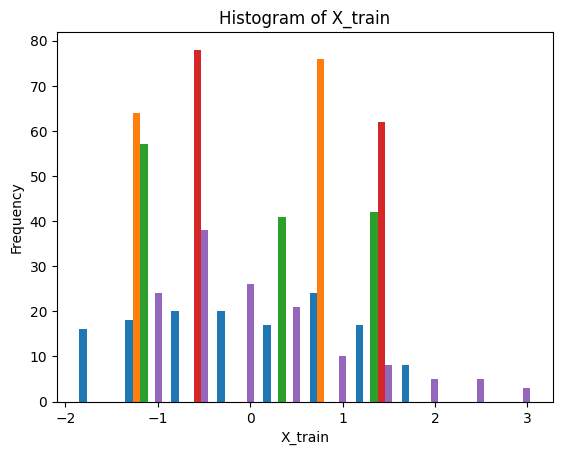

In [112]:
#visualise scaled data
plt.hist(X_train, bins=10)
plt.xlabel('X_train')
plt.ylabel('Frequency')
plt.title('Histogram of X_train')
plt.show()


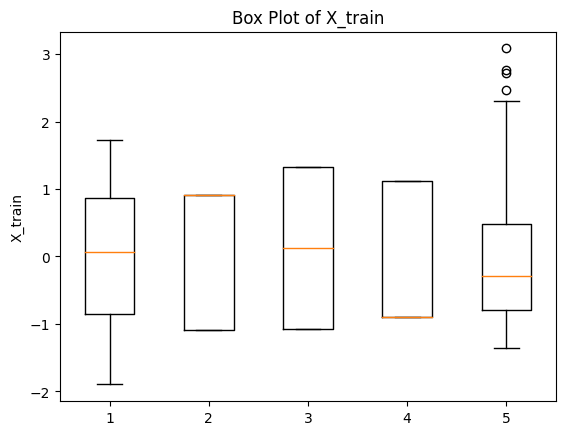

In [113]:
plt.boxplot(X_train)
plt.ylabel('X_train')
plt.title('Box Plot of X_train')
plt.show()

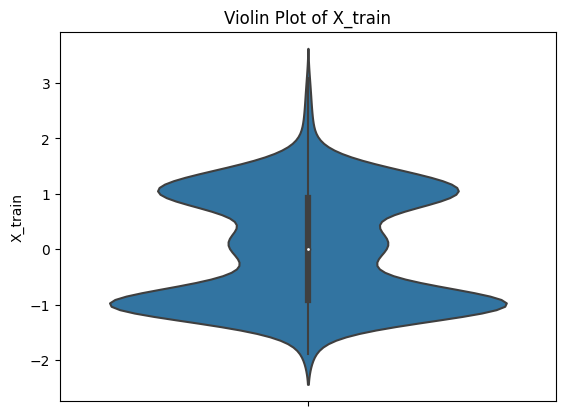

In [114]:
sns.violinplot(y = X_train)
plt.ylabel('X_train')
plt.title('Violin Plot of X_train')
plt.show()

Training a logistic regression classifier

In [115]:
# Fit a Logistic Regression model to the Training set
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [116]:
# Make predictions on the Test set
y_pred = model.predict(X_test)
y_pred

array([4, 1, 4, 4, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 3, 0, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 4, 0, 0, 2, 4, 4, 0, 4, 2, 4, 0, 1, 0, 4, 0])

In [117]:
#Training a Support vector machine classifier
# Make predictions on the Test set
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine classifier
model = SVC()

# Fit the model on the training data
model.fit(X_train, y_train)



SVC()

In [118]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([4, 0, 4, 0, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 0, 0, 2, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 0, 0, 0, 2, 4, 4, 0, 4, 2, 4, 0, 2, 0, 4, 0])

In [119]:
#Training a random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
# Make predictions on the Test set
y_pred = model.predict(X_test)
y_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 1, 0, 0, 0])